# PD1 - Adam Frej

## Import danych

In [1]:
import pandas as pd
pd.options.display.max_columns = 60
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset_diabetes/diabetic_data.csv")

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Oczywiście zmienną objaśnianą jest 'readmitted', którą trzeba zagregować do binarnej.

## Preprocessing

Usunięcie niepotrzebnych numerów pacjentów oraz badań (dodatkowo mogą to być dane wrażliwe):

In [4]:
data = data.drop(columns=['encounter_id', 'patient_nbr'])

Podział na dane kategoryczne i numeryczne:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                101766 non-null  object
 9   medical_specialty         101766 non-null  object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

In [6]:
data_cat = data.select_dtypes(include=['object'])
data_cat = data_cat.drop(columns='readmitted')
data_num = data.select_dtypes(include=['int64'])
data_num = data_num.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
data_cat['admission_type_id'] = data['admission_type_id']
data_cat['discharge_disposition_id'] = data['discharge_disposition_id']
data_cat['admission_source_id'] = data['admission_source_id']

### Dane kategoryczne

Liczności danych kategorycznych (brak danych numerycznych, więc nie ma '?' w nich - są kompletne):

In [7]:
for col in data_cat.columns:
    print(data[col].value_counts(), '\n')

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64 

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64 

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64 

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64 

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64 

?                                   49949
Int

Usunięcie zmiennych bardzo skupionych wokół jednej kategorii:

In [8]:
data_cat = data_cat.drop(columns=['weight', 'max_glu_serum', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                          'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                          'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                          'metformin-rosiglitazone', 'metformin-pioglitazone'])

Zmienne 'medical_specialty', 'diag_1', 'diag_2' i 'diag_3' mają bardzo dużą ziarnistość. Warto pogrupować rzadkie kategorie w jedną:

In [9]:
def group_as_other(var):
    rare = var.value_counts() < 100
    return var.apply(lambda x: 'other' if rare[x] else x)

In [10]:
data_cat['medical_specialty'] = group_as_other(data_cat['medical_specialty'])
data_cat['diag_1'] = group_as_other(data_cat['diag_1'])
data_cat['diag_2'] = group_as_other(data_cat['diag_2'])
data_cat['diag_3'] = group_as_other(data_cat['diag_3'])

Widać poprawę:

In [11]:
data_cat['medical_specialty'].value_counts()

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
other                                  925
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology  

In [12]:
data_cat['diag_1'].value_counts()

other    10802
428       6862
414       6581
786       4016
410       3614
         ...  
202        104
211        103
487        102
785        101
593        101
Name: diag_1, Length: 139, dtype: int64

In [13]:
data_cat['diag_2'].value_counts()

other     9754
276       6752
428       6662
250       6071
427       5036
          ... 
482        106
250.13     104
250.42     103
412        102
V10        101
Name: diag_2, Length: 134, dtype: int64

In [14]:
data_cat['diag_3'].value_counts()

250      11555
other     9867
401       8289
276       5175
428       4577
         ...  
569        107
728        107
196        105
459        104
211        100
Name: diag_3, Length: 139, dtype: int64

Braki danych występują tylko w zmiennych kategorycznych, więc nie da się ich zastąpić statystycznie. W żadnej zmiennej (dotychczas nieusuniętej) nie przekraczają połowy obserwacji, więć najlepiej je potraktować jako osobną kategorię.

Label encoding zmiennych:

In [15]:
data_cat = data_cat.astype('category')

In [16]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      101766 non-null  category
 1   gender                    101766 non-null  category
 2   age                       101766 non-null  category
 3   payer_code                101766 non-null  category
 4   medical_specialty         101766 non-null  category
 5   diag_1                    101766 non-null  category
 6   diag_2                    101766 non-null  category
 7   diag_3                    101766 non-null  category
 8   A1Cresult                 101766 non-null  category
 9   metformin                 101766 non-null  category
 10  glipizide                 101766 non-null  category
 11  glyburide                 101766 non-null  category
 12  pioglitazone              101766 non-null  category
 13  rosiglitazone             101

In [17]:
for col in data_cat.columns:
    data_cat[col] = data_cat[col].cat.codes

In [18]:
data_cat

,race,gender,age,payer_code,medical_specialty,diag_1,diag_2,diag_3,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,admission_type_id,discharge_disposition_id,admission_source_id
0,3,0,0,0,16,138,122,126,2,1,1,1,1,1,1,1,0,5,23,0
1,3,0,1,0,0,28,11,138,2,1,1,1,1,1,3,0,1,0,0,6
2,1,0,2,0,0,104,10,138,2,1,2,1,1,1,1,1,1,0,0,6
3,3,1,3,0,0,124,133,48,2,1,1,1,1,1,3,0,1,0,0,6
4,3,1,4,0,0,8,133,8,2,1,2,1,1,1,2,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,7,8,0,19,133,67,1,2,1,1,1,1,0,0,1,0,2,6
101762,1,0,8,8,0,87,25,115,2,1,1,1,1,1,2,1,1,0,3,4
101763,3,1,7,8,0,39,92,34,2,2,1,1,1,1,0,0,1,0,0,6
101764,3,0,8,8,24,133,29,125,2,1,2,1,2,1,3,0,1,1,2,6


### Dane numeryczne

Rozkłady jednowymiarowe:

In [19]:
data_num.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


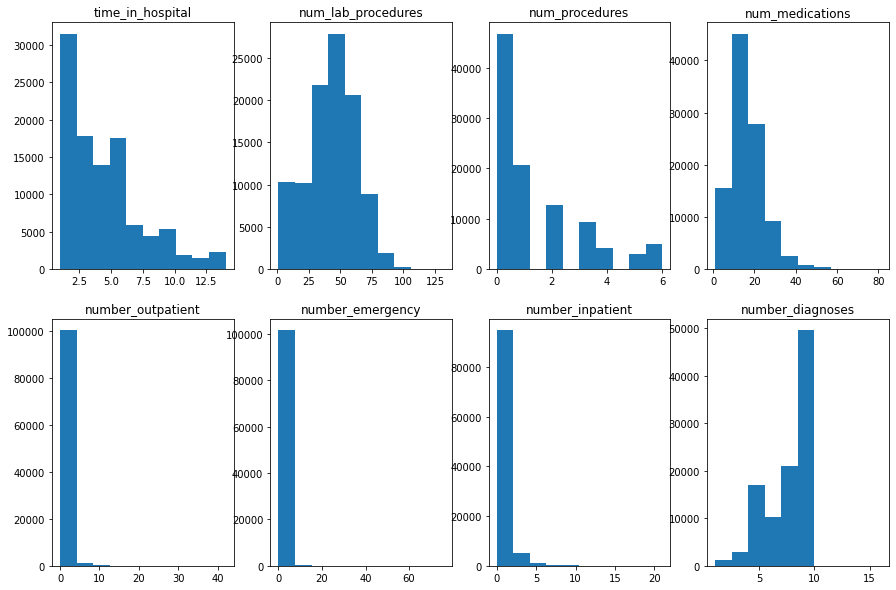

In [20]:
fig, axs = plt.subplots(2,4, figsize=(15, 10))
for i, col in enumerate(data_num.columns):
    axs[0 if i<4 else 1, i%4].hist(data_num[col])
    axs[0 if i<4 else 1, i%4].set_title(col)
plt.show()

Jak widać, zmienne 'number_outpatient', 'number_emergency' i 'number_inpatient' są skupione wokół jednej wartości, więc niewiele wnoszą do modelu.

In [21]:
data_num = data_num.drop(columns=['number_outpatient', 'number_emergency', 'number_inpatient'])

Korelacje zmiennych:

In [22]:
data_num.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses
time_in_hospital,1.000000,0.318450,0.191472,0.466135,0.220186
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,0.152773
num_procedures,0.191472,0.058066,1.000000,0.385767,0.073734
num_medications,0.466135,0.268161,0.385767,1.000000,0.261526
number_diagnoses,0.220186,0.152773,0.073734,0.261526,1.000000


Brak silnie skorelowanych zmiennych.

### Zmienna celu

Agregacja do binarnej zmiennej oraz kodowanie:

In [23]:
data['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [24]:
data['readmitted'] = data['readmitted'].apply(lambda x: 0 if x=='NO' else 1)
data['readmitted'].unique()

array([0, 1], dtype=int64)

In [25]:
data['readmitted'].value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

Dane są zbalansowane.

### Łączenie danych w całość:

In [26]:
data2 = pd.merge(data_cat, data_num, left_index=True, right_index=True)
data = pd.merge(data2, data['readmitted'], left_index=True, right_index=True)

In [27]:
data

,race,gender,age,payer_code,medical_specialty,diag_1,diag_2,diag_3,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted
0,3,0,0,0,16,138,122,126,2,1,1,1,1,1,1,1,0,5,23,0,1,41,0,1,1,0
1,3,0,1,0,0,28,11,138,2,1,1,1,1,1,3,0,1,0,0,6,3,59,0,18,9,1
2,1,0,2,0,0,104,10,138,2,1,2,1,1,1,1,1,1,0,0,6,2,11,5,13,6,0
3,3,1,3,0,0,124,133,48,2,1,1,1,1,1,3,0,1,0,0,6,2,44,1,16,7,0
4,3,1,4,0,0,8,133,8,2,1,2,1,1,1,2,0,1,0,0,6,1,51,0,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,7,8,0,19,133,67,1,2,1,1,1,1,0,0,1,0,2,6,3,51,0,16,9,1
101762,1,0,8,8,0,87,25,115,2,1,1,1,1,1,2,1,1,0,3,4,5,33,3,18,9,0
101763,3,1,7,8,0,39,92,34,2,2,1,1,1,1,0,0,1,0,0,6,1,53,0,9,13,0
101764,3,0,8,8,24,133,29,125,2,1,2,1,2,1,3,0,1,1,2,6,10,45,2,21,9,0
